### Zadania

1. Dodać iteracje do treningu
2. Dodać rysunek zmian strat w kolejnych iteracjach

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# N is batch size; D_in is input dimension; liczba przykładów
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 16, 4, 0, 1
#dimensional input - 4 dane mamy u nas; to cechy z danych które wyciągamy tak właściwie #dimensional output - 1 bo chcemy jedno wyjście
# Create random input and output data

x_numpy = np.array(    [[0., 0., 0., 1.],
                        [1., 0., 0., 1.],
                        [0., 1., 0., 1.],
                        [0., 0., 1., 1.],
                        [1., 1., 0., 1.],
                        [1., 0., 1., 1.],
                        [0., 1., 1., 1.],
                        [1., 1., 1., 1.],
                        [0., 0., 0., 0.],
                        [1., 0., 0., 0.],
                        [0., 1., 0., 0.],
                        [0., 0., 1., 0.],
                        [1., 1., 0., 0.],
                        [1., 0., 1., 0.],
                        [0., 1., 1., 0.],
                        [1., 1., 1., 0.]]) #x - dane wejściowe #tu mamy ustawione tak, że ostatnia wartość wyznacza nam labelke, czyli y, reszta to cechy

print(x_numpy.shape) #pokazanie wymiarów, 16 wierszy, 4 kolumny

(16, 4)


In [2]:
y_numpy = np.array(     [[1.],
                         [1.],
                         [1.],
                         [1.],
                         [1.],
                         [1.],
                         [1.],
                         [1.],
                         [0.],
                         [0.],
                         [0.],
                         [0.],
                         [0.],
                         [0.],
                         [0.],
                         [0.]])  #y - labelki/odpowiedzi


print(y_numpy.shape)

(16, 1)


In [3]:
# Randomly initialize weights inicjalizujemy wagi  --------------- #pomnożenie 2 macierzy przez siebie tak żeby mieć jeden wynik - macierz 1x1
w = np.random.randn(D_in, D_out)

print(w)
print(w.shape)

[[-0.17073985]
 [ 0.15523231]
 [-0.21873933]
 [ 1.06399147]]
(4, 1)


In [0]:
learning_rate = 1e-2
loss_list = []

In [16]:
# Forward pass: compute predicted y
y_pred = x_numpy.dot(w) #pierwsza predykacja; po kolejnych predykcjach (poprawki) powinniśmy dostać nasze jedynki i zera jak w y
print(y_pred)


[[ 1.00000001e+00]
 [ 9.99999999e-01]
 [ 1.00000002e+00]
 [ 9.99999996e-01]
 [ 1.00000001e+00]
 [ 9.99999990e-01]
 [ 1.00000001e+00]
 [ 1.00000000e+00]
 [ 0.00000000e+00]
 [-6.64012538e-09]
 [ 1.02467800e-08]
 [-9.12672622e-09]
 [ 3.60665458e-09]
 [-1.57668516e-08]
 [ 1.12005373e-09]
 [-5.52007165e-09]]


In [17]:
# Compute and print loss
loss = np.square(y_pred - y_numpy).sum() #liczymy strate względem tego co powinno byc w y - ile nasza predykacja roznila sie od wyniku ktory powinien byc; suma tego - wartosc ogolna straty
loss_list.append(loss)
# Backprop to compute gradients of w1 and w2 with respect to loss
grad_y_pred = 2.0 * (y_pred - y_numpy) #liczymy pochodną od funkcji straty. przesuwamy wartości wag w stronę minimum
grad_w = x_numpy.T.dot(grad_y_pred) #gradient dla wag

# Update weights
w = w - learning_rate * grad_w  #zmieniamy wartość wag, żeby dawały mniejszą stratę
print(w)

[[-6.10891533e-09]
 [ 9.42703757e-09]
 [-8.39658811e-09]
 [ 1.00000001e+00]]


In [18]:
for i in range (200):
  y_pred = x_numpy.dot(w)
  loss = np.square(y_pred - y_numpy).sum() #liczymy strate względem tego co powinno byc w y - ile nasza predykacja roznila sie od wyniku ktory powinien byc; suma tego - wartosc ogolna straty
  loss_list.append(loss)
# Backprop to compute gradients of w1 and w2 with respect to loss
  grad_y_pred = 2.0 * (y_pred - y_numpy) #liczymy pochodną od funkcji straty. przesuwamy wartości wag w stronę minimum
  grad_w = x_numpy.T.dot(grad_y_pred) #gradient dla wag

# Update weights
  w = w - learning_rate * grad_w  #zmieniamy wartość wag, żeby dawały mniejszą stratę

print(w)
print(y_pred)        #9.99999999e-01 = ok 1

[[-4.81465332e-16]
 [ 4.17899680e-16]
 [-6.11998982e-16]
 [ 1.00000000e+00]]
[[ 1.00000000e+00]
 [ 1.00000000e+00]
 [ 1.00000000e+00]
 [ 1.00000000e+00]
 [ 1.00000000e+00]
 [ 1.00000000e+00]
 [ 1.00000000e+00]
 [ 1.00000000e+00]
 [ 0.00000000e+00]
 [-5.01994186e-16]
 [ 4.71851802e-16]
 [-6.47218597e-16]
 [-3.01423836e-17]
 [-1.14921278e-15]
 [-1.75366795e-16]
 [-6.77360981e-16]]


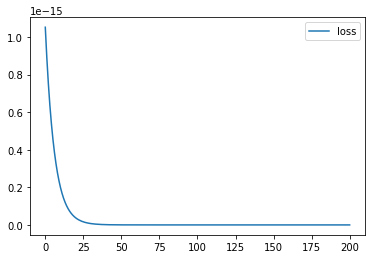

In [19]:
plt.plot(loss_list, label = 'loss')
plt.legend()
plt.show()